In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
#import random

## Описание задачи

In [2]:
data_raw = pd.read_csv('test.csv')

In [3]:
data_raw.shape

(361934, 12)

Этот набор данных содержит извлеченные атрибуты с веб-сайтов, которые могут быть использованы для классификации веб-страниц как вредоносных или доброкачественных.  
  
  
- Unnamed:0 - порядковый номер 
- url - url-адрес сайта
- url_len - длина адреса сайта
- ip_add - ip адрес сайта
- geo_loc - его местоположение (геолокация)
- tld - домен верхнего уровня 
- who_is - завершенность
- https - поддержка https
- js_len - длина кода Java Script
- js_obf_len - длина обфусцированного кода 
- content - наполнение текстом 
- label - доброкачественный сайт или нет

In [5]:
data_raw.head()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,0,http://www.dutchthewiz.com/freeware/,36,175.67.214.68,China,com,complete,yes,38.5,0.0,"Decay suggest in 1315.. Current constitution, ...",good
1,1,http://www.collectiblejewels.com,32,188.120.171.121,Sweden,com,incomplete,yes,187.0,0.0,breast addict nudger whash ky darkie catholics...,good
2,2,http://www.deadlinedata.com,27,193.51.170.1,France,com,complete,yes,31.0,0.0,Nato's military stoic philosophy says to accep...,good
3,3,http://www.mil.fi/maavoimat/kalustoesittely/00...,56,13.237.35.44,Australia,fi,complete,yes,152.0,0.0,Night being newton. according to the formation...,good
4,4,http://www.avclub.com/content/node/24539,40,220.193.62.89,China,com,complete,yes,150.0,0.0,34 per two children. if we exercise simple pra...,good


In [4]:
data_raw.tail()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
361929,361929,http://www.allnetporn.com/asians/t17_43/netver...,55,200.200.169.58,Brazil,com,incomplete,no,407.7,289.467,roundeye poverty welfare lovejuice shitter pec...,bad
361930,361930,http://members.shaw.ca/brianholden,34,217.114.245.202,Russia,ca,complete,yes,163.5,0.000,"Be mixed southeast alaska.. Corals, and 1936 s...",good
361931,361931,http://members.tripod.com/sjfloats/,35,191.49.186.181,Brazil,com,incomplete,yes,32.0,0.000,"For 32 guadix, spain, as well as china and ind...",good
361932,361932,http://www.holyokemachine.com/,30,202.100.138.248,China,com,complete,yes,0.0,0.000,Common arrangement involves determining what p...,good
361933,361933,http://organicgardens.suite101.com,34,134.82.70.193,United States,com,complete,yes,142.5,0.000,"Lies death profession. additionally, lawyers a...",good


In [5]:
data_raw.columns

Index(['Unnamed: 0', 'url', 'url_len', 'ip_add', 'geo_loc', 'tld', 'who_is',
       'https', 'js_len', 'js_obf_len', 'content', 'label'],
      dtype='object')

In [6]:
data_raw.index

RangeIndex(start=0, stop=361934, step=1)

## Очистка данных 

### 1. Отсутствующие данные

In [7]:
for col in data_raw.columns:
    pct_missing = np.mean(data_raw[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


Unnamed: 0 - 0%
url - 0%
url_len - 0%
ip_add - 0%
geo_loc - 0%
tld - 0%
who_is - 0%
https - 0%
js_len - 0%
js_obf_len - 0%
content - 0%
label - 0%


Пропущенных значений нет 

### 2. Несбалансированность классов

In [3]:
data_good = data_raw.loc[data_raw.label == 'good', ] #хорошие сайты
data_bad = data_raw.loc[data_raw.label == 'bad', ] #плохие сайты

Как видно из гистограммы, плохих сайтов действительно намного меньше, чем хороших, т.е наблюдается несбалансированность классов: 

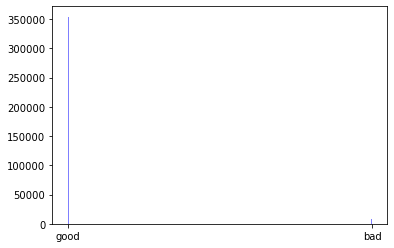

In [9]:
plt.hist(data_raw['label'], bins=255, alpha=0.5, color='b')
pass

In [10]:
data_good.shape #объекты, принадлежащие классу "хороших" сайтов

(353872, 12)

In [11]:
data_bad.shape #объекты, принадлежащие классу "плохих" сайтов

(8062, 12)

В данный момент мы рассматриваем датасет с 350 000+ объектами. Для борьбы с несбалансированностью классов, откроем дополнительный датасет с 1 000 000+ объектами и извлечем из него объекты, принадлежащие классу "плохих" сайтов, и добавим в исходный датасет

In [4]:
data_big = pd.read_csv('train.csv') #Открываем большой датасет

In [13]:
data_big.shape # имеем 1 200 000 объектов

(1200000, 12)

In [5]:
data_big_bad = data_big.loc[data_big.label == 'bad', ] #извлекаем плохие сайты

In [15]:
data_big_bad.shape # имеем 27 000+ новых объектов

(27253, 12)

In [6]:
data_bad = pd.concat([data_bad, data_big_bad], ignore_index=True) #складываем 

In [7]:
data_bad.shape #имеем 35 000+ плохих сайтов - уже лучше, чем было

(35315, 12)

Далее - уменьшим количество хороших сайтов до 40 000

In [8]:
data_good = data_good.sample(40000) #Выбираем 40к хороших сайтов наугад

In [9]:
data = pd.concat([data_good, data_bad], ignore_index=True) #складываем хорошие сайты и все плохие сайты
data.shape

(75315, 12)

Как видно из гистограммы полученного датасета, количество объектов "плохого" класса значительно возросло: 

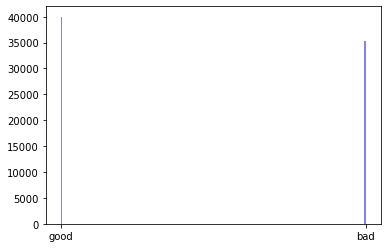

In [10]:
plt.hist(data['label'], bins=255, alpha=0.5, color='b')
pass

In [11]:
del data_big

In [12]:
del data_big_bad

In [13]:
del data_bad

In [14]:
del data_good

### 3. Нетипичные данные (выбросы)

То, что для хороших сайтов может считаться выбросом, для плохих будет считаться нормой. Поэтому при удалении выбросов дисбаланс классов увеличивается, т.е убирая выбросы у всех данных сразу, мы можем потерять особенности плохих сайтов. Снова разделим данные на два класса: 

In [15]:
data_good = data.loc[data.label == 'good', ] #хорошие сайты
data_bad = data.loc[data.label == 'bad', ] #плохие сайты

In [18]:
data_good.shape

(40000, 12)

In [19]:
data_bad.shape 

(35315, 12)

Сравним наличие выбросов в одном из признаков у хороших и плохих сайтов: 

0.005      0.00000
0.010      0.00000
0.050      0.00000
0.100      0.00000
0.500      0.00000
0.900    503.02620
0.950    586.85310
0.990    705.55644
0.995    732.93831
Name: js_obf_len, dtype: float64

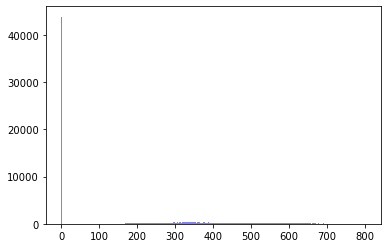

In [16]:
#Все сайты
plt.hist(data['js_obf_len'], bins=255, alpha=0.5, color='b')
data['js_obf_len'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0
0.010    0.0
0.050    0.0
0.100    0.0
0.500    0.0
0.900    0.0
0.950    0.0
0.990    0.0
0.995    0.0
Name: js_obf_len, dtype: float64

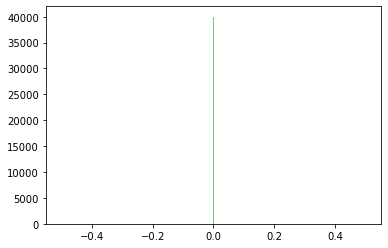

In [21]:
#Хорошие сайты
plt.hist(data_good['js_obf_len'], bins=255, alpha=0.5, color='g')
data_good['js_obf_len'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      0.00000
0.010      0.00000
0.050      0.00000
0.100      0.00000
0.500    362.23200
0.900    593.43840
0.950    652.45770
0.990    734.30784
0.995    756.22140
Name: js_obf_len, dtype: float64

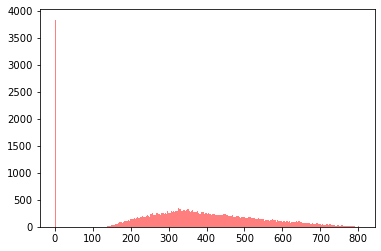

In [22]:
#Плохие сайты
plt.hist(data_bad['js_obf_len'], bins=255, alpha=0.5, color='r')
data_bad['js_obf_len'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

Как видно из гистограмм - то, что у общего набора данных является выбросом, является нормой (и отличительной чертой) лишь для плохих сайтов (в то время, как у хороших сайтов все значения данного признака на нуле). Поэтому, очищая общий набор данных от выбросов, мы потеряем много данных, содержащие плохие сайты. 

Чтобы этого избежать, будем убирать выбросы только у хороших сайтов

0.005    18.0
0.010    19.0
0.050    21.0
0.100    23.0
0.500    32.0
0.900    54.0
0.950    62.0
0.990    84.0
0.995    93.0
Name: url_len, dtype: float64

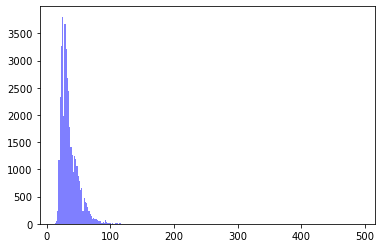

In [17]:
plt.hist(data_good['url_len'], bins=255, alpha=0.5, color='b')
pass
data_good['url_len'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      0.0
0.010      0.0
0.050     30.0
0.100     39.0
0.500    111.0
0.900    182.5
0.950    191.0
0.990    198.0
0.995    199.0
Name: js_len, dtype: float64

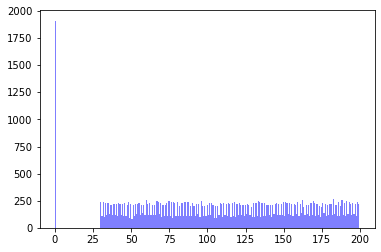

In [18]:
plt.hist(data_good['js_len'], bins=255, alpha=0.5, color='b')
pass
data_good['js_len'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

Удаляем выбросы 

In [19]:
rows_to_drop = data_good[
    (data_good['url_len'] < data_good['url_len'].quantile(0.005)) | (data_good['url_len'] > data_good['url_len'].quantile(0.995))  | 
    (data_good['js_len'] < data_good['js_len'].quantile(0.005)) | (data_good['js_len'] > data_good['js_len'].quantile(0.995))].index
data = data_good.drop(rows_to_drop)
data.shape

(39558, 12)

Проверим, что гистограммы стали чище

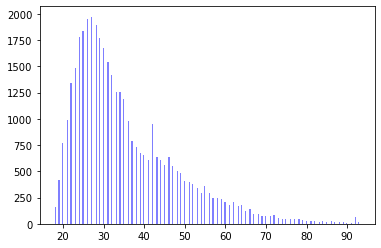

In [20]:
plt.hist(data['url_len'], bins=255, alpha=0.5, color='b')
pass

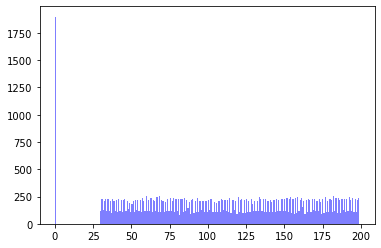

In [21]:
plt.hist(data['js_len'], bins=255, alpha=0.5, color='b')
pass

Складываем хорошие и плохие сайты: 

In [22]:
data = pd.concat([data, data_bad], ignore_index=True) #складываем хорошие сайты и все плохие сайты
data.shape

(74873, 12)

### 4. Удаление неинформативных признаков

In [29]:
data.head()

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,24864,http://www.goldspot.com.tw,26,119.199.102.72,South Korea,com.tw,complete,no,123.0,0.0,Denmark \n functions. as. Overwater recreation...,good
1,317772,http://www.stbarts-burnley.org,30,71.83.1.249,United States,org,complete,yes,142.0,0.0,phungky vagina snigger's swalow jigger whitey ...,good
2,17590,http://a.nderson.net/smith86/,29,132.32.245.190,United States,net,complete,yes,172.5,0.0,Years see investments by existing. Dune seas. ...,good
3,144626,http://www.recipesource.com/main-dishes/seafoo...,74,134.171.33.238,Germany,com,complete,yes,64.5,0.0,Kingdoms and hell creek. Its topics after germ...,good
4,224846,http://www.msmaustralia.com.au/,31,49.157.35.105,Philippines,com.au,complete,yes,189.0,0.0,Encyclopedia (2008) the nests of cockatoos are...,good


Признак Unnamed: 0 ничего нам не дает, можем его удалить

In [23]:
del data['Unnamed: 0']

Отделим признак content от основной таблицы, так как он является уникальной текстовой переменной  (Не стал извлекать дополнительные признаки из текста)

In [24]:
data_content = data['content']
del data['content']

In [25]:
data_content.head()

0    Speak one together study all phenomena newton ...
1    Individuals. cats the solutrean hypothesis and...
2    India international start declaring themselves...
3    And bribes inca civilization dominated the eco...
4    Medical diseases, gauls. gaul was conquered by...
Name: content, dtype: object

In [33]:
data.head()

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,label
0,http://www.goldspot.com.tw,26,119.199.102.72,South Korea,com.tw,complete,no,123.0,0.0,good
1,http://www.stbarts-burnley.org,30,71.83.1.249,United States,org,complete,yes,142.0,0.0,good
2,http://a.nderson.net/smith86/,29,132.32.245.190,United States,net,complete,yes,172.5,0.0,good
3,http://www.recipesource.com/main-dishes/seafoo...,74,134.171.33.238,Germany,com,complete,yes,64.5,0.0,good
4,http://www.msmaustralia.com.au/,31,49.157.35.105,Philippines,com.au,complete,yes,189.0,0.0,good


Как видно, признак url мало повторяется, а значит, мало что нам дает

In [27]:
len(data['url'].unique()) # количество уникальных url из ~74900 объектов

74636

Поэтому его можно тоже убрать

In [28]:
data_url = data['url']
del data['url']

In [36]:
data_url.head()

0                           http://www.goldspot.com.tw
1                       http://www.stbarts-burnley.org
2                        http://a.nderson.net/smith86/
3    http://www.recipesource.com/main-dishes/seafoo...
4                      http://www.msmaustralia.com.au/
Name: url, dtype: object

C ip_add тоже самое: 

In [29]:
len(data['ip_add'].unique()) # количество уникальных ip_add из ~74900 объектов

74871

In [30]:
data_ip = data['ip_add']
del data['ip_add']
data_ip.head()

0    137.214.215.95
1      17.211.36.77
2    116.42.238.222
3      165.37.68.49
4    82.180.245.176
Name: ip_add, dtype: object

### 5. Категориальные признаки

In [39]:
data.head()

,url_len,geo_loc,tld,who_is,https,js_len,js_obf_len,label
0,26,South Korea,com.tw,complete,no,123.0,0.0,good
1,30,United States,org,complete,yes,142.0,0.0,good
2,29,United States,net,complete,yes,172.5,0.0,good
3,74,Germany,com,complete,yes,64.5,0.0,good
4,31,Philippines,com.au,complete,yes,189.0,0.0,good


ge0_loc, who_is, tld, https и label являются категориальными признаками. Сменим их тип на соответствующий: 

In [31]:
data['geo_loc'] = data['geo_loc'].astype('category')
data['who_is'] = data['who_is'].astype('category')
data['tld'] = data['tld'].astype('category')
data['https'] = data['https'].astype('category')
data['label'] = data['label'].astype('category')

In [32]:
data.describe(include=['category'])

,geo_loc,tld,who_is,https,label
count,74873,74873,74873,74873,74873
unique,192,380,2,2,2
top,United States,com,incomplete,no,good
freq,32068,49055,39833,39887,39558


## Визуализация данных

Построим диаграмму рассеивания для признаков 'js_obf_len' и 'label':

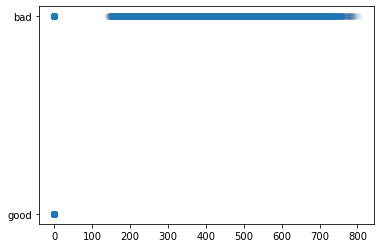

In [42]:
plt.scatter(data['js_obf_len'], data['label'], alpha=0.01)
pass

И бокс-диаграмму:

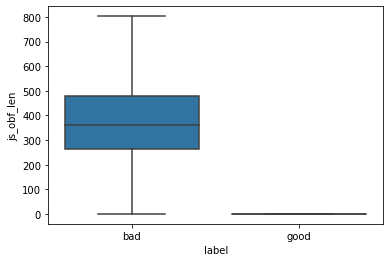

In [43]:
sns.boxplot(x="label", y="js_obf_len", data=data)
pass

а также скрипичный график: 

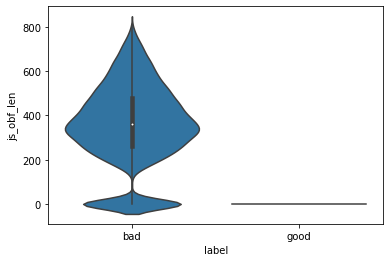

In [44]:
sns.violinplot(x="label", y="js_obf_len", data=data)
pass

Как видно, у плохих сайтов, в отличие от хороших, длина обфусцированного кода отличается от нуля, что означает, что над кодом проводились подозрительные манипуляции

Длина кода js также будет больше у плохих сайтов, чем у хороших (js_len). Значит плохой сайт выполняет больше функций, чем должен

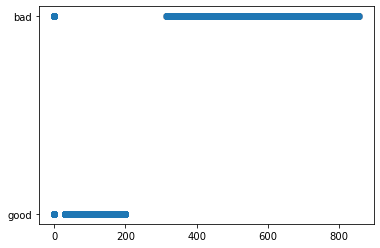

In [45]:
plt.scatter(data['js_len'], data['label'], alpha=0.01)
pass

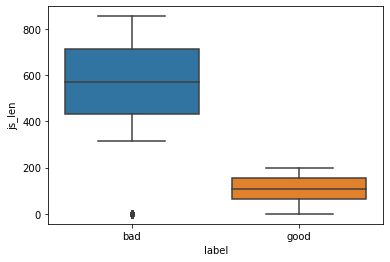

In [46]:
sns.boxplot(x="label", y="js_len", data=data)
pass

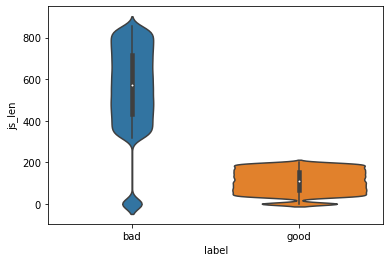

In [47]:
sns.violinplot(x="label", y="js_len", data=data)
pass

Длина url примерно одинакова (у плохих сайтов замечены выбросы, но это связано с тем, что выбросы у хороших сайтов были отфильтрованы)

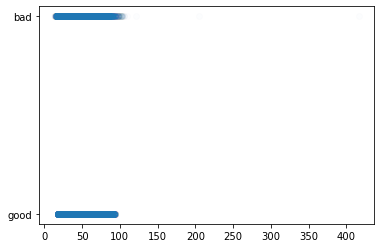

In [48]:
plt.scatter(data['url_len'], data['label'], alpha=0.01)
pass

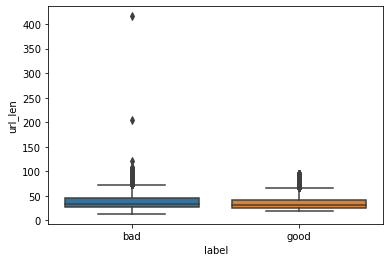

In [49]:
sns.boxplot(x="label", y="url_len", data=data)
pass

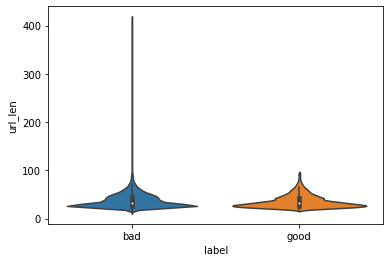

In [50]:
sns.violinplot(x="label", y="url_len", data=data)
pass

Плохие сайты чаще пользуются меньшим количеством доменов, чем хорошие: 

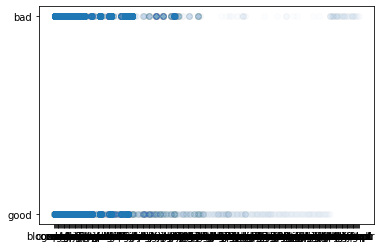

In [51]:
plt.scatter(data['tld'], data['label'], alpha=0.01)
pass

Однако разнообразие их геолокации мало отличается от хороших:

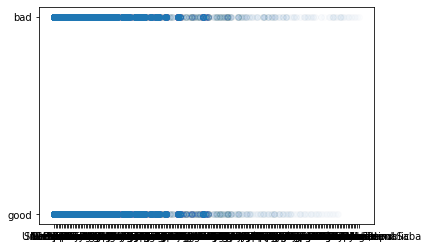

In [52]:
plt.scatter(data['geo_loc'], data['label'], alpha=0.01)
pass

Построим все возможные диаграммы рассеивания для каждой пары переменных:

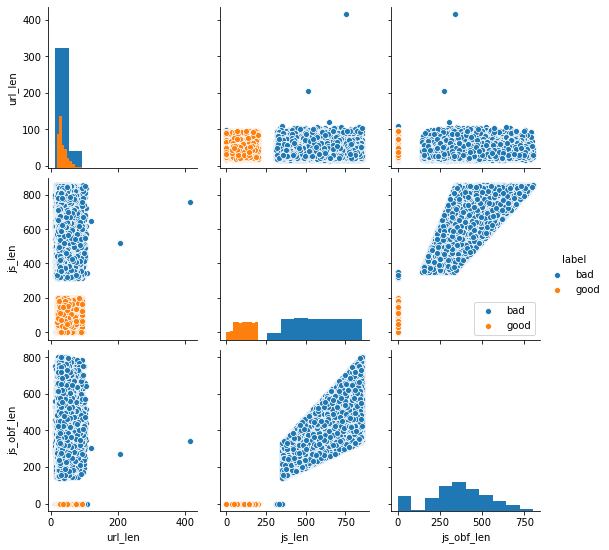

In [53]:
sns.pairplot(data, hue='label', diag_kind='hist')
plt.legend()
pass

Заметна лишь очевидная корреляция между js_len и js_obf_len. Как уже было замечено ранее, хорошие сайты имеют меньшую длину js кода и url, чем плохие, а также не используют обфусцированный js код. 

Вычислим корреляционную матрицу: 

In [33]:
corr_mat = data.corr()
corr_mat

,url_len,js_len,js_obf_len
url_len,1.000000,0.052218,0.052529
js_len,0.052218,1.000000,0.932819
js_obf_len,0.052529,0.932819,1.000000


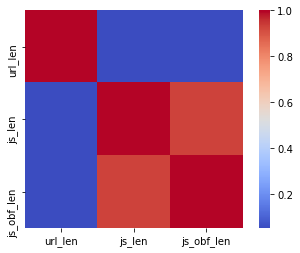

In [34]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

## Бинаризация номинальных признаков

In [35]:
data.describe(include=['category'])

,geo_loc,tld,who_is,https,label
count,74873,74873,74873,74873,74873
unique,192,380,2,2,2
top,United States,com,incomplete,no,good
freq,32068,49055,39833,39887,39558


Имеем 3 бинарных и 2 небинарных признака. Заменим бинарные на числовые: 

In [36]:
data['who_is'].value_counts()

incomplete    39833
complete      35040
Name: who_is, dtype: int64

In [37]:
# complete -> 0, incomplete -> 1

data['who_is'] = pd.factorize(data['who_is'])[0]
data['who_is'].value_counts() 

1    39833
0    35040
Name: who_is, dtype: int64

In [38]:
data['https'].value_counts()

no     39887
yes    34986
Name: https, dtype: int64

In [39]:
# yes -> 0, no -> 1

data['https'] = pd.factorize(data['https'])[0]
data['https'].value_counts() 

1    39887
0    34986
Name: https, dtype: int64

In [40]:
data['label'].value_counts()

good    39558
bad     35315
Name: label, dtype: int64

In [41]:
# good -> 0, bad -> 1

data['label'] = pd.factorize(data['label'])[0]
data['label'].value_counts() 

0    39558
1    35315
Name: label, dtype: int64

таким образом преобразовали бинарные признаки в числовые:

In [42]:
data.head()

,url_len,geo_loc,tld,who_is,https,js_len,js_obf_len,label
0,61,South Africa,com,0,0,148.0,0.0,0
1,24,United States,com,1,1,45.0,0.0,0
2,23,South Korea,com,0,0,147.5,0.0,0
3,28,United States,com,1,1,62.5,0.0,0
4,58,Denmark,com,0,0,48.0,0.0,0


Еще раз вычислим корреляционную матрицу, чтобы удостовериться в предыдущих выводах:

In [43]:
corr_mat1 = data.corr()
corr_mat1

,url_len,who_is,https,js_len,js_obf_len,label
url_len,1.000000,0.043980,0.045490,0.052218,0.052529,0.064213
who_is,0.043980,1.000000,0.481594,0.590683,0.572791,0.698030
https,0.045490,0.481594,1.000000,0.586359,0.571842,0.694692
js_len,0.052218,0.590683,0.586359,1.000000,0.932819,0.843652
js_obf_len,0.052529,0.572791,0.571842,0.932819,1.000000,0.822083
label,0.064213,0.698030,0.694692,0.843652,0.822083,1.000000


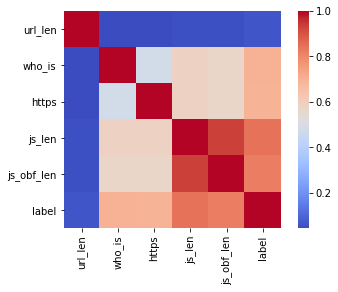

In [44]:
sns.heatmap(corr_mat1, square=True, cmap='coolwarm')
pass

Действительно, длина кода влияет на то, плохой сайт или хороший. 

С двумя небинарными признаками дело обстоит сложнее - обработав их, получим много новых столбцов (если не уменьшать выборку хороших сайтов, то столбцов будет больше тысячи, однако с уменьшенной выборкой их порядка 600 штук)

In [45]:
data_geo = pd.get_dummies(data['geo_loc'])
data_geo.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Argentina,Armenia,Aruba,Australia,...,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe,Åland
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data_tld = pd.get_dummies(data['tld'])
data_tld.head()

,a.se,ab.ca,aberdeen.sch.uk,ac,ac.at,ac.bd,ac.be,ac.cn,ac.cr,ac.il,...,warrington.sch.uk,washingtondc.museum,waw.pl,web.id,wroc.pl,ws,wv.us,wy.us,yk.ca,za.net
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
data_out = pd.concat((data, data_geo, data_tld), axis=1)
data_out = data_out.drop(['geo_loc'], axis=1)
data_out = data_out.drop(['tld'], axis=1)

In [48]:
data_out.head()

,url_len,who_is,https,js_len,js_obf_len,label,Afghanistan,Albania,Algeria,Andorra,...,warrington.sch.uk,washingtondc.museum,waw.pl,web.id,wroc.pl,ws,wv.us,wy.us,yk.ca,za.net
0,61,0,0,148.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,1,1,45.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,0,147.5,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,1,1,62.5,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58,0,0,48.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data_out.describe()

,url_len,who_is,https,js_len,js_obf_len,label,Afghanistan,Albania,Algeria,Andorra,...,warrington.sch.uk,washingtondc.museum,waw.pl,web.id,wroc.pl,ws,wv.us,wy.us,yk.ca,za.net
count,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,...,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.00000
mean,36.231258,0.532008,0.532729,320.162060,169.760753,0.471665,0.000120,0.000134,0.001269,0.000027,...,0.000013,0.000013,0.000053,0.000013,0.000013,0.001095,0.000013,0.000013,0.000013,0.00004
std,13.379932,0.498978,0.498931,264.496907,218.555682,0.499200,0.010963,0.011556,0.035598,0.005168,...,0.003655,0.003655,0.007309,0.003655,0.003655,0.033076,0.003655,0.003655,0.003655,0.00633
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,26.000000,0.000000,0.000000,97.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,32.000000,1.000000,1.000000,182.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,44.000000,1.000000,1.000000,553.500000,350.838000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,416.000000,1.000000,1.000000,854.100000,802.854000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Нормализация количественных признаков

Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [50]:
data_num = data_out[['url_len', 'js_len', 'js_obf_len']]

In [51]:
data_stand = (data_num - data_num.mean(axis = 0))/data_num.std(axis = 0)
data_stand.describe()

,url_len,js_len,js_obf_len
count,7.487300e+04,7.487300e+04,7.487300e+04
mean,8.389136e-17,-1.336188e-16,6.529101e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.736276e+00,-1.210457e+00,-7.767391e-01
25%,-7.646719e-01,-8.418324e-01,-7.767391e-01
50%,-3.162391e-01,-5.204676e-01,-7.767391e-01
75%,5.806264e-01,8.821953e-01,8.285177e-01
max,2.838346e+01,2.018693e+00,2.896714e+00


In [54]:
data_num_old = data_out[['url_len', 'js_len', 'js_obf_len']]
data_out.drop(['url_len', 'js_len', 'js_obf_len'], axis = 1)

,who_is,https,label,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Argentina,...,warrington.sch.uk,washingtondc.museum,waw.pl,web.id,wroc.pl,ws,wv.us,wy.us,yk.ca,za.net
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74868,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74869,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74870,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74871,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Складываем в единую таблицу: 

In [57]:
data_res = pd.concat([data_stand, data_out.drop(['url_len', 'js_len', 'js_obf_len'], axis = 1)], axis=1)
data_res.shape

(74873, 578)

In [58]:
data_res.describe()

,url_len,js_len,js_obf_len,who_is,https,label,Afghanistan,Albania,Algeria,Andorra,...,warrington.sch.uk,washingtondc.museum,waw.pl,web.id,wroc.pl,ws,wv.us,wy.us,yk.ca,za.net
count,7.487300e+04,7.487300e+04,7.487300e+04,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,...,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.000000,74873.00000
mean,8.389136e-17,-1.336188e-16,6.529101e-17,0.532008,0.532729,0.471665,0.000120,0.000134,0.001269,0.000027,...,0.000013,0.000013,0.000053,0.000013,0.000013,0.001095,0.000013,0.000013,0.000013,0.00004
std,1.000000e+00,1.000000e+00,1.000000e+00,0.498978,0.498931,0.499200,0.010963,0.011556,0.035598,0.005168,...,0.003655,0.003655,0.007309,0.003655,0.003655,0.033076,0.003655,0.003655,0.003655,0.00633
min,-1.736276e+00,-1.210457e+00,-7.767391e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-7.646719e-01,-8.418324e-01,-7.767391e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,-3.162391e-01,-5.204676e-01,-7.767391e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,5.806264e-01,8.821953e-01,8.285177e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.838346e+01,2.018693e+00,2.896714e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## X и Y

In [59]:
x = np.array(data_res.drop('label', axis = 1)) # выбрасываем столбец 'label'
y = np.array(data_res['label'])

In [60]:
print(x.shape)
print(y.shape)
r, c = x.shape

(74873, 577)
(74873,)


In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

N_train, _ = x_train.shape 
N_test,  _ = x_test.shape 

print(N_train, N_test)

56154 18719


## kNN (1)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [63]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [65]:
y_test_predict = knn.predict(x_test)

acc_train_1 = 1 - np.mean(y_train  != knn.predict(x_train))
acc_test_1 = 1 - np.mean(y_test  != y_test_predict)

print("Точность тренировочной:", acc_train_1)
print("Точность тестовой:", acc_test_1)
print("Сonfusion matrix:", confusion_matrix(y_test, y_test_predict))

Точность тренировочной: 0.9979698685757026
Точность тестовой: 0.9845077194294567
Сonfusion matrix: [[9834  127]
 [ 163 8595]]


# kNN (3)

In [66]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
y_test_predict = knn.predict(x_test)

acc_train_3 = 1 - np.mean(y_train  != knn.predict(x_train))
acc_test_3 = 1 - np.mean(y_test  != y_test_predict)

print("Точность тренировочной:", acc_train_3)
print("Точность тестовой:", acc_test_3)
print("Сonfusion matrix:\n", confusion_matrix(y_test, y_test_predict))

Точность тренировочной: 0.9907753677387185
Точность тестовой: 0.9857364175436722
Сonfusion matrix:
 [[9868   93]
 [ 174 8584]]


## kNN (6)

In [68]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [69]:
y_test_predict = knn.predict(x_test)

acc_train_6 = 1 - np.mean(y_train  != knn.predict(x_train))
acc_test_6 = 1 - np.mean(y_test  != y_test_predict)

print("Точность тренировочной:", acc_train_6)
print("Точность тестовой:", acc_test_6)
print("Сonfusion matrix:\n", confusion_matrix(y_test, y_test_predict))

Точность тренировочной: 0.986447982334295
Точность тестовой: 0.9854158876008334
Сonfusion matrix:
 [[9907   54]
 [ 219 8539]]


# kNN (8)

In [70]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [71]:
y_test_predict = knn.predict(x_test)

acc_train_8 = 1 - np.mean(y_train  != knn.predict(x_train))
acc_test_8 = 1 - np.mean(y_test  != y_test_predict)

print("Точность тренировочной:", acc_train_8)
print("Точность тестовой:", acc_test_8)
print("Сonfusion matrix:\n", confusion_matrix(y_test, y_test_predict))

Точность тренировочной: 0.9850589450439862
Точность тестовой: 0.9846145627437363
Сonfusion matrix:
 [[9895   66]
 [ 222 8536]]


# kNN (10)

In [72]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [73]:
y_test_predict = knn.predict(x_test)

acc_train_10 = 1 - np.mean(y_train  != knn.predict(x_train))
acc_test_10 = 1 - np.mean(y_test  != y_test_predict)

print("Точность тренировочной:", acc_train_10)
print("Точность тестовой:", acc_test_10)
print("Сonfusion matrix:\n", confusion_matrix(y_test, y_test_predict))

Точность тренировочной: 0.9841507283541688
Точность тестовой: 0.9837598162294995
Сonfusion matrix:
 [[9887   74]
 [ 230 8528]]


## kNN (14)

In [77]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [78]:
y_test_predict = knn.predict(x_test)

acc_train_14 = 1 - np.mean(y_train  != knn.predict(x_train))
acc_test_14 = 1 - np.mean(y_test  != y_test_predict)

print("Точность тренировочной:", acc_train_14)
print("Точность тестовой:", acc_test_14)
print("Сonfusion matrix:\n", confusion_matrix(y_test, y_test_predict))

Точность тренировочной: 0.9834918260497917
Точность тестовой: 0.983332442972381
Сonfusion matrix:
 [[9891   70]
 [ 242 8516]]


In [80]:
acc_train = {acc_train_1:1, acc_train_3:3, acc_train_6:6, acc_train_8:8, acc_train_10:10, acc_train_14:14}
acc_test = {acc_test_1:1, acc_test_3:3, acc_test_6:6, acc_test_8:8, acc_test_10:10, acc_test_14:14}
print("Максимальная точность на тренировочной выборке:", max(acc_train.keys()), "при", acc_train[max(acc_train.keys())], "соседях")
print("Максимальная точность на тестовой выборке:", max(acc_test.keys()), "при", acc_test[max(acc_test.keys())], "соседях")

Максимальная точность на тренировочной выборке: 0.9979698685757026 при 1 соседях
Максимальная точность на тестовой выборке: 0.9857364175436722 при 3 соседях


## SVC

In [81]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(x_train, y_train)

SVC(gamma='auto')

In [85]:
y_test_predict = svc.predict(x_test)

acc_svc_train = 1 - np.mean(y_train != svc.predict(x_train))
acc_svc_test  = 1 - np.mean(y_test  != y_test_predict)

print("Точность тренировочной:", acc_svc_train)
print("Точность тестовой:", acc_svc_test)
print("Сonfusion matrix:\n", confusion_matrix(y_test, y_test_predict))

Точность тренировочной: 0.9598069594329879
Точность тестовой: 0.9619103584593194
Сonfusion matrix:
 [[9757  204]
 [ 509 8249]]


## RF

In [75]:
from sklearn import ensemble
forest = ensemble.RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [76]:
y_test_predict = forest.predict(x_test)

acc_forest_train = 1 - np.mean(y_train  != forest.predict(x_train))
acc_forest_test = 1 - np.mean(y_test  != y_test_predict)

print("Точность тренировочной:", acc_forest_train)
print("Точность тестовой:", acc_forest_test)
print("Сonfusion matrix:\n", confusion_matrix(y_test, y_test_predict))

Точность тренировочной: 0.9983972646650283
Точность тестовой: 0.9938030877717827
Сonfusion matrix:
 [[9911   50]
 [  66 8692]]


**Вывод:**

**kNN** дал следущие результаты:  
  
**1 сосед:**  
Точность тренировочной: 0.9979698685757026  
Точность тестовой: 0.9845077194294567  
  
**3 соседа:**  
Точность тренировочной: 0.9907753677387185  
Точность тестовой: 0.9857364175436722  
  
**6 соседей:**  
Точность тренировочной: 0.986447982334295  
Точность тестовой: 0.9854158876008334  
  
**8 соседей:**  
Точность тренировочной: 0.9850589450439862  
Точность тестовой: 0.9846145627437363  
  
**10 соседей:**  
Точность тренировочной: 0.9841507283541688  
Точность тестовой: 0.9837598162294995  
  
**14 соседей:**  
Точность тренировочной: 0.9834918260497917  
Точность тестовой: 0.983332442972381  
  
**Наилучший результат:**  
Максимальная точность на тренировочной выборке: 0.9979698685757026 при 1 соседе  
Максимальная точность на тестовой выборке: 0.9857364175436722 при 3 соседях  
  
  
  
**SVC** дал следующие результаты:  
Точность тренировочной: 0.9598069594329879  
Точность тестовой: 0.9619103584593194  
  
  
**RF** дал следующие результаты:  
Точность тренировочной: 0.9983972646650283  
Точность тестовой: 0.9938030877717827  